### Load from analysis.db

In [12]:
from activity_tracker.pipeline import models, measurement, subject, visit

import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

df_subject = subject.Subject.fetch(format="frame").reset_index()
df_visit = visit.Visit.fetch(format="frame").reset_index()
df_measurement = measurement.DailyMeasurement.fetch(format="frame").reset_index()
df_frailty = models.Frailty.fetch(format="frame").reset_index()

In [5]:
# Measure days per subject
measure_days_df = df_measurement.groupby('subject_id').size().reset_index(name='measured_days').sort_values(by='measured_days', ascending=False)
measure_days_df

,subject_id,measured_days
72,MDE074,316
24,MDE025,299
79,MDE081,286
41,MDE042,246
40,MDE041,246
26,MDE027,246
85,MDE087,246
87,MDE089,241
37,MDE038,240
95,MDE097,238


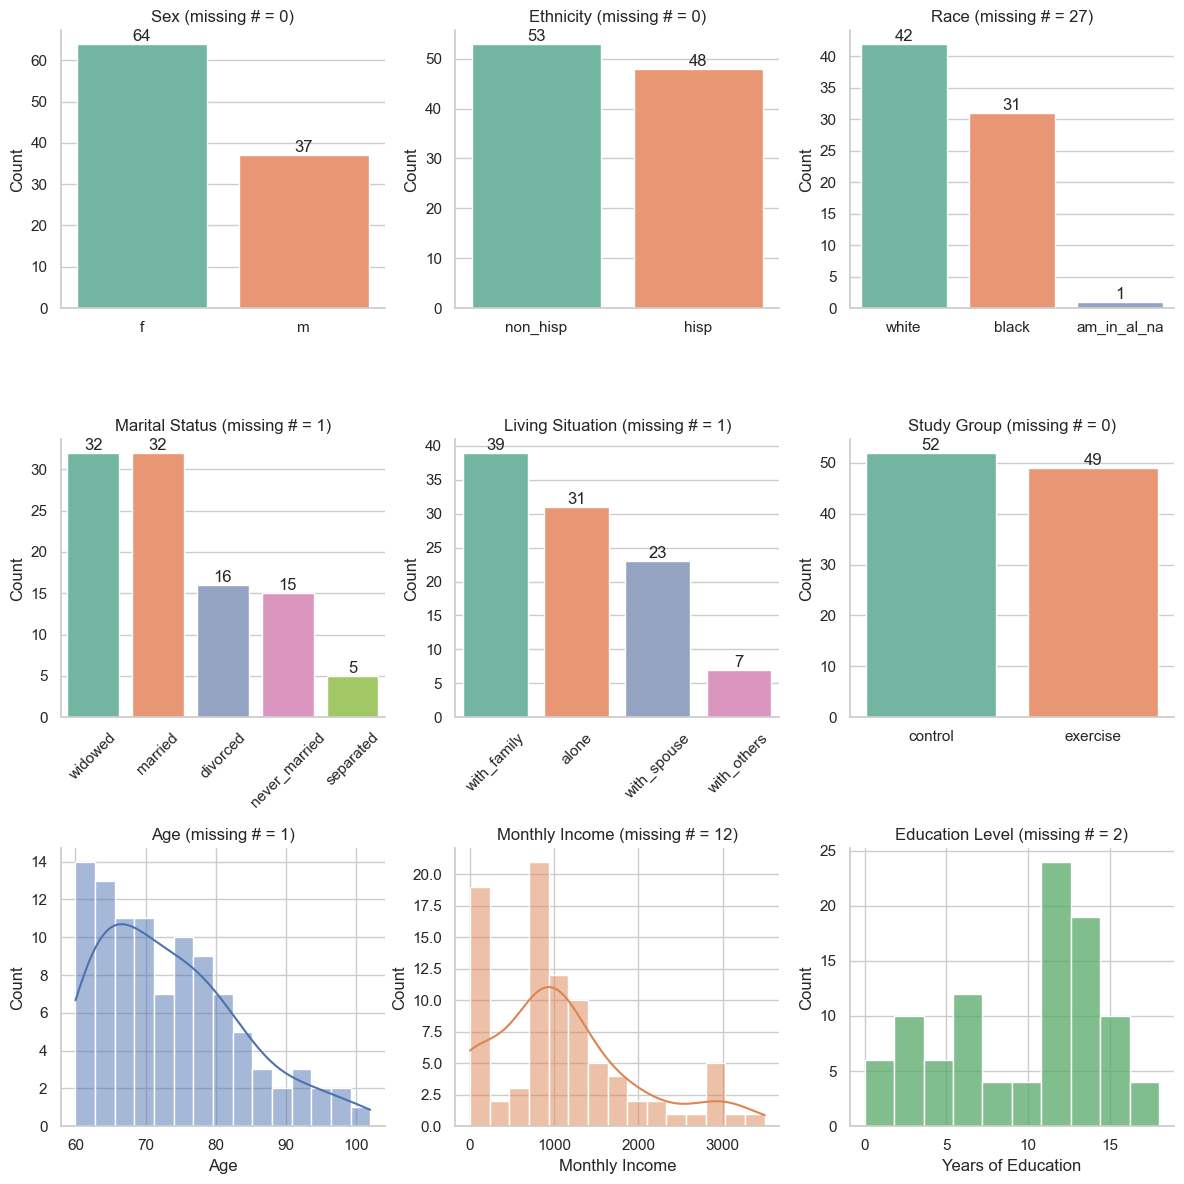

In [6]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(12, 12), dpi=100)
cat_vars = [
    ("sex", "Sex"),
    ("ethnicity", "Ethnicity"),
    ("race", "Race"),
    ("marital_status", "Marital Status"),
    ("living_situation", "Living Situation"),
    ("group", "Study Group"),
]

for idx, (col, title) in enumerate(cat_vars):
    ax = axes[idx // 3, idx % 3]
    counts = df_subject[col].value_counts()
    missing_count = df_subject[col].isna().sum()
    sns.barplot(x=counts.index, y=counts.values, ax=ax, palette="Set2")
    ax.set_title(f"{title} (missing # = {missing_count})")
    ax.set_ylabel("Count")
    ax.set_xlabel("")
    if col in ["marital_status", "living_situation"]:
        ax.tick_params(axis='x', rotation=45)
    else:
        ax.tick_params(axis='x', rotation=0)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')
    sns.despine(ax=ax)

# Age
age_missing = df_subject["age"].isna().sum()
sns.histplot(df_subject["age"].dropna(), bins=15, kde=True, ax=axes[2, 0], color="#4c72b0")
axes[2, 0].set_title(f"Age (missing # = {age_missing})")
axes[2, 0].set_xlabel("Age")
sns.despine(ax=axes[2, 0])

# Monthly income
income_missing = df_subject["monthly_income"].isna().sum()
sns.histplot(df_subject["monthly_income"].dropna(), bins=15, kde=True, ax=axes[2, 1], color="#dd8452")
axes[2, 1].set_title(f"Monthly Income (missing # = {income_missing})")
axes[2, 1].set_xlabel("Monthly Income")
sns.despine(ax=axes[2, 1])

# Education
education_missing = df_subject["education"].isna().sum()
sns.histplot(df_subject["education"].dropna(), bins=10, kde=False, ax=axes[2, 2], color="#55a868")
axes[2, 2].set_title(f"Education Level (missing # = {education_missing})")
axes[2, 2].set_xlabel("Years of Education")
sns.despine(ax=axes[2, 2])

plt.tight_layout()
plt.show()

In [7]:
plt.figure(figsize=(30, 25), dpi=300)
sns.scatterplot(
    data=df_measurement,
    x='date',
    y='subject_id',
    s=13,
    alpha=0.7,
    label='Measurement'
)
plt.xlabel('Date')
plt.ylabel('Subject ID')
plt.title('Measurement Days')

subjects = sorted(df_measurement['subject_id'].unique())
plt.ylim(subjects[-1], subjects[0])
plt.gca().set_ylim(plt.gca().get_ylim()[0] + 1, plt.gca().get_ylim()[1] - 1)

# Mark visit dates
plt.scatter(
    df_visit['date'],
    df_visit['subject_id'],
    color='red',
    marker='*',
    s=50,
    label='Visit Date'
)

plt.legend()
plt.tight_layout()
plt.show()

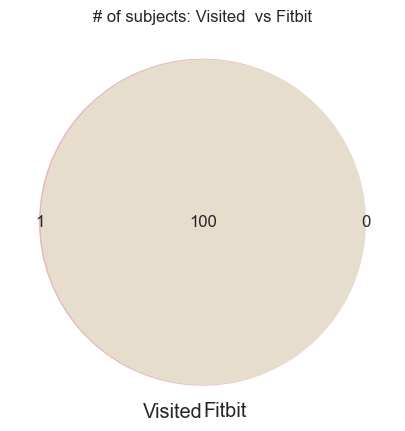

{'MDE043'} was visited but not no fitbit measurement data


In [8]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

visited_subjects = set(df_visit["subject_id"].unique())
measured_subjects = set(df_measurement["subject_id"].unique())
both_subjects = visited_subjects & measured_subjects

# venn diagram
plt.figure(figsize=(5, 5))
venn2([visited_subjects, measured_subjects], set_labels=('Visited', 'Fitbit'))
plt.title('# of subjects: Visited  vs Fitbit')
plt.show()

len(df_measurement["subject_id"].unique()) # number of subjects with fitbit measurements
len(df_visit["subject_id"].unique()) # number of subjects with visits

print(f"{visited_subjects - measured_subjects} was visited but not no fitbit measurement data")

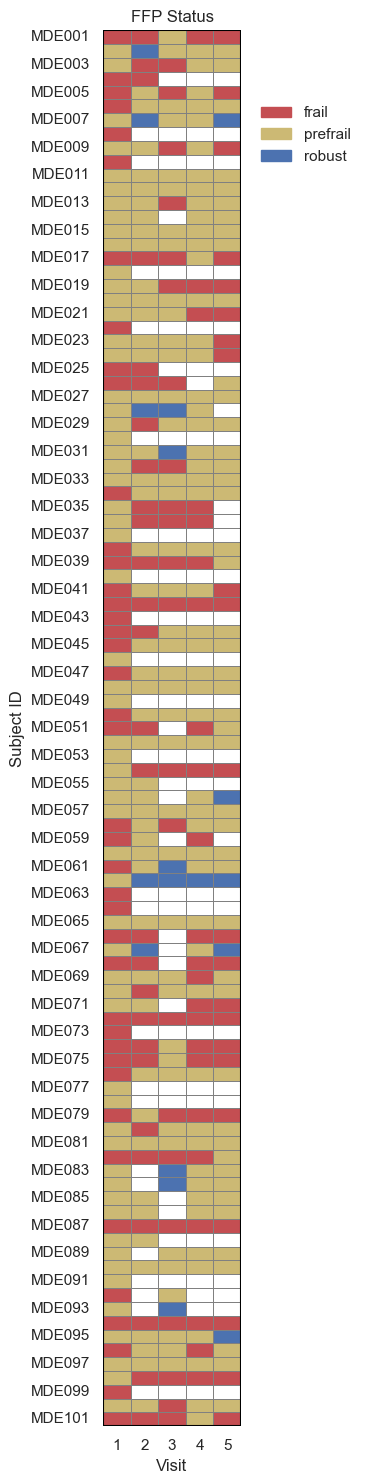

In [ ]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as patches
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from activity_tracker import utils

# Load mapping
mapping_dict = utils.load_data_mapper("../data/data_mapper.yml")
ffp_labels = mapping_dict['ffp_status']

# Create mapping from string values to numeric for heatmap
status_mapping = {'frail': 0, 'prefrail': 1, 'robust': 2}
df_frailty['ffp_status_numeric'] = df_frailty['ffp_status'].map(status_mapping)

colors = ['r', 'y', 'b']  # frail, prefrail, robust
cmap = ListedColormap(colors)
cmap.set_bad('white')  
bounds = [-0.5, 0.5, 1.5, 2.5]
norm = BoundaryNorm(bounds, cmap.N)

# Create heatmap matrix using numeric values
heat_matrix = df_frailty.pivot(index='subject_id', columns='visit_id', values='ffp_status_numeric')
heat_matrix = heat_matrix.reindex(sorted(heat_matrix.columns), axis=1)

# Plot
plt.figure(figsize=(4, 15))
ax = sns.heatmap(
    heat_matrix,
    cmap=cmap,
    norm=norm,
    linewidths=0.5,
    linecolor='gray',
    cbar=False,
    square=False,
    mask=heat_matrix.isna()
)

# Add a rectangle boundary around the heatmap
ax.add_patch(
    patches.Rectangle(
        (0, 0),
        heat_matrix.shape[1],
        heat_matrix.shape[0],
        fill=False,
        edgecolor='black',
        lw=1.5
    )
)

# Custom legend with dots
legend_labels = [mpatches.Patch(color=colors[i], label=ffp_labels[i]) for i in range(3)]
plt.legend(
    handles=legend_labels,
    bbox_to_anchor=(1.1, 0.95),
    loc='upper left',
    borderaxespad=0.,
    frameon=False
)

plt.title('FFP Status')
plt.xlabel('Visit')
plt.ylabel('Subject ID')
plt.tight_layout()
plt.show()

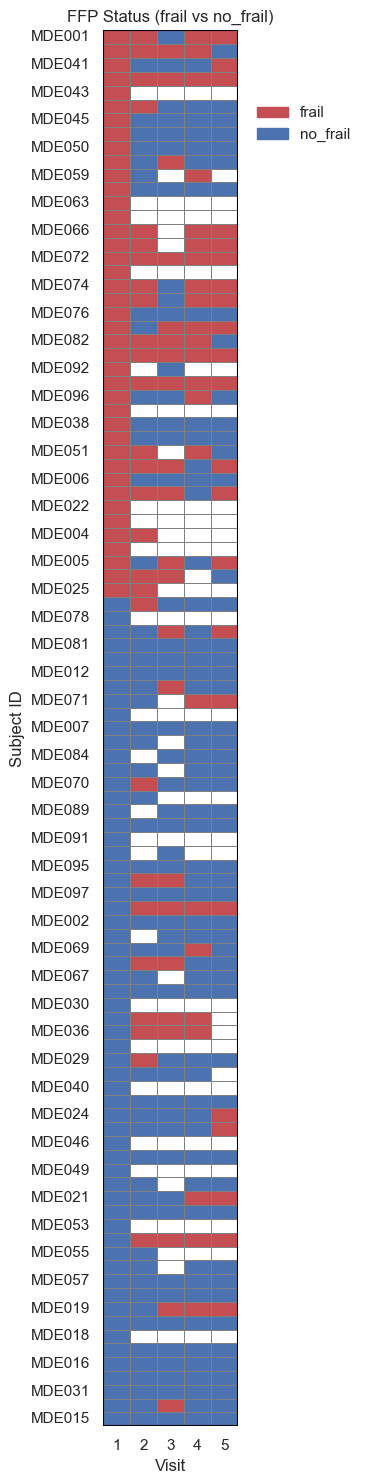

In [35]:
# Combine prefrail and robust into no_frail
heat_matrix_no_frail = heat_matrix.replace({1.0: 1, 2.0: 1})
heat_matrix_no_frail = heat_matrix_no_frail.sort_values(by=1)
# For plotting
colors = ['r', 'b']  # frail, no_frail
labels = ['frail', 'no_frail']
cmap = ListedColormap(colors)
cmap.set_bad('white')
bounds = [-0.5, 0.5, 1.5]
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(4, 15))
ax = sns.heatmap(
    heat_matrix_no_frail,
    cmap=cmap,
    norm=norm,
    linewidths=0.5,
    linecolor='gray',
    cbar=False,
    square=False,
    mask=heat_matrix_no_frail.isna()
)
# Add a rectangle boundary around the heatmap
ax.add_patch(
    patches.Rectangle(
        (0, 0),
        heat_matrix.shape[1],
        heat_matrix.shape[0],
        fill=False,
        edgecolor='black',
        lw=1.5
    )
)

# Custom legend
legend_labels = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(2)]
plt.legend(
    handles=legend_labels,
    bbox_to_anchor=(1.1, 0.95),
    loc='upper left',
    borderaxespad=0.,
    frameon=False
)

plt.title('FFP Status (frail vs no_frail)')
plt.xlabel('Visit')
plt.ylabel('Subject ID')
plt.tight_layout()
plt.show()

In [44]:
df_frailty

,subject_id,visit_id,wt_loss,weak,slow,exhaust,phys_act,ffp_score,ffp_status,ffp_status_binary,ffp_status_numeric
0,MDE001,1,1,1,1,0,1,4,frail,frail,0.0
1,MDE001,2,1,1,1,0,1,4,frail,frail,0.0
2,MDE001,3,0,1,1,0,0,2,prefrail,no_frail,1.0
3,MDE001,4,1,1,1,0,1,4,frail,frail,0.0
4,MDE001,5,0,1,1,1,0,3,frail,frail,0.0
...,...,...,...,...,...,...,...,...,...,...,...
408,MDE101,1,1,1,1,0,1,4,frail,frail,0.0
409,MDE101,2,0,1,1,0,1,3,frail,frail,0.0
410,MDE101,3,0,1,1,0,1,3,frail,frail,0.0
411,MDE101,4,0,1,1,0,0,2,prefrail,no_frail,1.0


### State transition

In [46]:
# Sankey plot of frailty status transitions across visits
import pandas as pd
import plotly.graph_objects as go

# Prepare your data
df_wide = df_frailty.pivot(index='subject_id', columns='visit_id', values='ffp_status_binary')
df_wide = df_wide.sort_index(axis=1) 

labels = ['frail', 'no_frail']
short_labels = {'frail': 'F', 'no_frail': 'N'}

# Node labels: just short label (count)
node_labels = []
for v in range(1, df_wide.shape[1]+1):
    for label in labels:
        count = (df_wide[v] == label).sum()
        node_labels.append(f"{short_labels[label]} ({count})")

sources = []
targets = []
values = []
custom_labels = []

for v in range(1, df_wide.shape[1]): 
    from_states = df_wide[v]
    to_states = df_wide[v+1]
    ct = pd.crosstab(from_states, to_states)
    for i, from_label in enumerate(labels):
        for j, to_label in enumerate(labels):
            count = ct.get(to_label, {}).get(from_label, 0)
            if count > 0:
                sources.append(i + (v-1)*len(labels))
                targets.append(j + v*len(labels))
                values.append(count)
                custom_labels.append(f"{short_labels[from_label]}→{short_labels[to_label]}: {count}")

# Two colors: red for frail, blue for no_frail
color_map = {'frail': 'crimson', 'no_frail': 'royalblue'}
node_colors = []
for v in range(df_wide.shape[1]):
    node_colors.extend([color_map[label] for label in labels])

fig = go.Figure(data=[go.Sankey(
    node=dict(label=node_labels, color=node_colors, pad=40, thickness=40),
    link=dict(source=sources, target=targets, value=values, label=custom_labels)
)])

n_visits = df_wide.shape[1]
for v in range(n_visits):
    x = v / (n_visits - 1) if n_visits > 1 else 0.5
    fig.add_annotation(
        x=x,
        y=-0.15,
        text=f"Visit {v+1}",
        showarrow=False,
        font=dict(size=15),
        xref="paper",
        yref="paper"
    )

fig.show()

In [48]:
# Assuming df_frailty is already loaded and has 'subject_id', 'visit_id', 'ffp_status_binary'
df = df_frailty[['subject_id', 'visit_id', 'ffp_status_binary']].dropna(subset=['ffp_status_binary'])
df = df.sort_values(['subject_id', 'visit_id'])

transitions = {
    ('frail', 'frail'): 0,
    ('frail', 'no_frail'): 0,
    ('no_frail', 'frail'): 0,
    ('no_frail', 'no_frail'): 0
}

for subject, group in df.groupby('subject_id'):
    states = group['ffp_status_binary'].tolist()
    for i in range(len(states) - 1):
        if pd.notna(states[i]) and pd.notna(states[i+1]):
            transitions[(states[i], states[i+1])] += 1

transition_matrix = pd.DataFrame(
    [[transitions[('frail', 'frail')], transitions[('frail', 'no_frail')]],
     [transitions[('no_frail', 'frail')], transitions[('no_frail', 'no_frail')]]],
    index=['frail', 'no_frail'],
    columns=['frail', 'no_frail']
)
print(transition_matrix)

          frail  no_frail
frail        63        37
no_frail     31       165


In [49]:
import numpy as np
prob_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)
print(prob_matrix)

eigvals, eigvecs = np.linalg.eig(prob_matrix.T)
stationary = np.real(eigvecs[:, np.isclose(eigvals, 1)])
stationary = stationary / stationary.sum()
print("Stationary distribution:", stationary.flatten())

             frail  no_frail
frail     0.630000  0.370000
no_frail  0.158163  0.841837
Stationary distribution: [0.29945904 0.70054096]


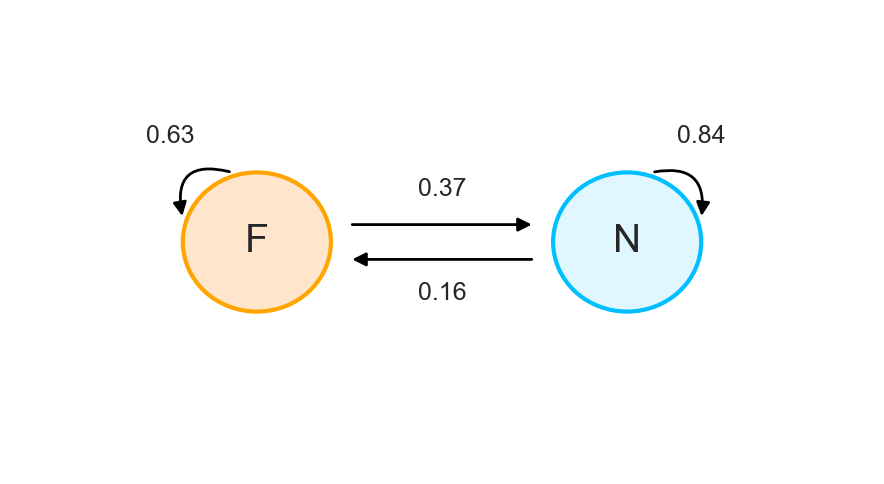

In [50]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, FancyArrowPatch

# Transition probabilities
probs = {
    ('F', 'F'): 0.630,
    ('F', 'N'): 0.370,
    ('N', 'F'): 0.158,
    ('N', 'N'): 0.842
}

# Node positions
node_pos = {'F': (0, 0), 'N': (3, 0)}

fig, ax = plt.subplots(figsize=(9, 5))
ax.set_xlim(-2, 5)
ax.set_ylim(-2, 2)
ax.axis('off')

# Draw ellipses for nodes
ellipse_F = Ellipse(xy=node_pos['F'], width=1.2, height=1.2,
                    edgecolor='orange', facecolor='#ffe5cc', lw=3)
ellipse_N = Ellipse(xy=node_pos['N'], width=1.2, height=1.2,
                    edgecolor='deepskyblue', facecolor='#e0f7ff', lw=3)
ax.add_patch(ellipse_F)
ax.add_patch(ellipse_N)

# Add node labels
ax.text(*node_pos['F'], 'F', fontsize=28, ha='center', va='center')
ax.text(*node_pos['N'], 'N', fontsize=28, ha='center', va='center')

# Arrow style
arrowprops = dict(arrowstyle='-|>', color='black', lw=2, mutation_scale=20)

# Self-loop F
arrow = FancyArrowPatch((node_pos['F'][0] - 0.2, node_pos['F'][1] + 0.6),
                        (node_pos['F'][0] - 0.6, node_pos['F'][1] + 0.2),
                        connectionstyle="arc3,rad=0.8", **arrowprops)
ax.add_patch(arrow)
ax.text(node_pos['F'][0] - 0.9, node_pos['F'][1] + 0.85,
        f"{probs[('F','F')]:.2f}", fontsize=18)

# Self-loop N
arrow = FancyArrowPatch((node_pos['N'][0] + 0.2, node_pos['N'][1] + 0.6),
                        (node_pos['N'][0] + 0.6, node_pos['N'][1] + 0.2),
                        connectionstyle="arc3,rad=-0.7", **arrowprops)
ax.add_patch(arrow)
ax.text(node_pos['N'][0] + 0.4, node_pos['N'][1] + 0.85,
        f"{probs[('N','N')]:.2f}", fontsize=18)

# F → N
arrow = FancyArrowPatch((node_pos['F'][0] + 0.75, node_pos['F'][1] + 0.15),
                        (node_pos['N'][0] - 0.75, node_pos['N'][1] + 0.15),
                        connectionstyle="arc3,rad=0.0", **arrowprops)
ax.add_patch(arrow)
ax.text(1.5, 0.4, f"{probs[('F','N')]:.2f}", fontsize=18, ha='center')

# N → F
arrow = FancyArrowPatch((node_pos['N'][0] - 0.75, node_pos['N'][1] - 0.15),
                        (node_pos['F'][0] + 0.75, node_pos['F'][1] - 0.15),
                        connectionstyle="arc3,rad=0.0", **arrowprops)
ax.add_patch(arrow)
ax.text(1.5, -0.5, f"{probs[('N','F')]:.2f}", fontsize=18, ha='center')

plt.tight_layout()
plt.show()